# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent_20agents import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

In [3]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_20/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Training in the Environment


In [6]:
agent = Agent(state_size=33, action_size=4, random_seed=10)

In [7]:
text_file = open("Training_20agents_1st_attempt.txt", "w")

n_episodes=100

scores_deque = deque(maxlen=100)
scores = []
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]        
    states = env_info.vector_observations                  
    score = np.zeros(num_agents)           

    while True:
        
        actions = np.array([agent.act(states[i]) for i in range(len(states))]) 
        env_info = env.step(np.array([actions[a] for a in range(len(actions))]))[brain_name]  
        next_states = env_info.vector_observations         
        rewards = env_info.rewards                         
        dones = env_info.local_done                        
        score += env_info.rewards                         
        for n in range(num_agents):
            
            state = np.expand_dims(states[n],0)
            action= np.expand_dims(actions[n],0)
            reward = np.expand_dims(np.array([rewards[n]]),0)
            next_state = np.expand_dims(next_states[n],0)
            done = np.expand_dims(np.array([dones[n]]),0)
            agent.step(state, action, reward, next_state, done)
        
        states = next_states           
        if np.any(dones):                                  
            break
    scores_deque.append(score)
    scores.append(score)   

    print('Total score {}, average score {} on episode: {}'.format(score, np.mean(scores), i_episode))
    text_file.write('Total score: {}, average score: {} #### Episode: {} \n'.format(score[0], np.mean(scores), i_episode))
text_file.close()

C:\Users\alessandro.padrin\AppData\Local\Continuum\anaconda3\envs\reinforcementenv\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\alessandro.padrin\Desktop\ale\BrainForge\deep-reinforcement-learning\p2_continuous-control\ddpg_agent_20agents.py:104: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Total score [0.15       0.47999999 0.84999998 0.39999999 0.70999998 1.20999997
 1.10999998 0.61999999 0.73999998 0.21       1.00999998 0.
 0.61999999 0.58999999 0.58999999 0.22999999 0.33999999 0.99999998
 0.38999999 0.05      ], average score 0.5649999873712659 on episode: 1
Total score [2.03999995 0.67999998 1.63999996 0.32999999 2.53999994 2.32999995
 1.01999998 0.91999998 1.23999997 3.45999992 2.13999995 1.80999996
 1.34999997 0.83999998 2.19999995 1.09999998 1.01999998 2.75999994
 2.50999994 2.44999995], average score 1.1419999744743108 on episode: 2
Total score [4.11999991 5.55999988 3.26999993 4.6399999  3.49999992 7.69999983
 1.78999996 4.6099999  2.47999994 2.73999994 4.16999991 4.00999991
 2.83999994 6.87999985 4.94999989 5.15999988 4.11999991 2.82999994
 2.99999993 8.08999982], average score 2.2023332841073473 on episode: 3
Total score [ 5.80999987  6.28999986  9.74999978  5.39999988  6.91999985  5.59999987
  9.1399998   4.6199999   7.91999982  6.02999987 12.34999972  8.5099

Total score [39.59999911 38.38999914 39.48999912 39.26999912 39.59999911 38.69999913
 39.60999911 39.49999912 39.17999912 39.62999911 39.04999913 39.34999912
 38.05999915 39.54999912 39.57999912 37.05999917 39.11999913 39.57999912
 39.44999912 39.28999912], average score 31.273861369940228 on episode: 29
Total score [37.60999916 38.41999914 39.42999912 39.52999912 37.73999916 37.38999916
 38.44999914 39.49999912 39.49999912 37.69999916 39.63999911 38.11999915
 37.54999916 34.45999923 39.12999913 37.34999917 39.09999913 39.35999912
 39.56999912 39.36999912], average score 31.512932628964386 on episode: 30
Total score [39.44999912 39.54999912 39.49999912 39.38999912 38.07999915 39.28999912
 39.39999912 39.01999913 39.58999912 39.39999912 38.42999914 39.42999912
 39.58999912 38.65999914 39.38999912 39.26999912 39.47999912 39.63999911
 39.04999913 37.05999917], average score 31.75875735465257 on episode: 31
Total score [38.72999913 39.24999912 39.09999913 39.60999911 38.56999914 38.2899991

Total score [38.01999915 36.53999918 36.52999918 35.44999921 39.05999913 39.13999913
 37.10999917 36.61999918 38.82999913 37.03999917 37.72999916 36.86999918
 39.04999913 37.45999916 39.30999912 37.78999916 38.61999914 37.62999916
 39.06999913 35.6099992 ], average score 34.817472436054544 on episode: 56
Total score [34.92999922 36.80999918 35.5999992  33.88999924 35.48999921 32.45999927
 34.82999922 37.32999917 36.37999919 37.24999917 36.35999919 35.47999921
 36.88999918 31.4999993  37.59999916 35.7799992  38.32999914 34.52999923
 36.0099992  30.48999932], average score 34.82763957241877 on episode: 57
Total score [39.00999913 35.01999922 38.69999913 37.20999917 39.52999912 37.98999915
 36.46999918 36.14999919 36.03999919 38.05999915 38.11999915 39.24999912
 38.27999914 36.66999918 39.14999912 39.30999912 38.77999913 36.58999918
 39.39999912 36.74999918], average score 34.879300944524786 on episode: 58
Total score [37.74999916 39.00999913 38.46999914 36.05999919 37.88999915 38.8499991

Total score [39.60999911 39.57999912 39.58999912 38.04999915 39.49999912 39.21999912
 39.24999912 39.41999912 39.47999912 39.28999912 38.44999914 38.01999915
 38.49999914 39.49999912 39.45999912 39.12999913 39.60999911 38.84999913
 39.61999911 39.53999912], average score 36.06768594081233 on episode: 83
Total score [39.58999912 38.86999913 39.20999912 38.14999915 39.20999912 39.18999912
 39.36999912 38.86999913 39.02999913 38.77999913 39.62999911 39.20999912
 39.18999912 38.86999913 39.14999912 39.55999912 39.34999912 38.27999914
 39.59999911 39.31999912], average score 36.10404085967845 on episode: 84
Total score [39.26999912 39.60999911 39.52999912 38.93999913 39.38999912 38.50999914
 39.01999913 38.86999913 39.02999913 39.42999912 38.26999914 39.11999913
 39.48999912 38.68999914 38.33999914 39.04999913 39.33999912 34.95999922
 39.63999911 38.70999913], average score 36.13646978052223 on episode: 85
Total score [39.39999912 39.33999912 39.06999913 38.50999914 38.22999915 39.38999912


In [8]:
torch.save(agent.actor_local.state_dict(), 'actor.pth')
torch.save(agent.critic_local.state_dict(), 'critic.pth')

In [12]:
torch.save(agent.actor_target.state_dict(), 'actor_target.pth')
torch.save(agent.critic_target.state_dict(), 'critic_target.pth')

### Average Score at each epoch

In [9]:
reward = []
for epoch in scores:
    reward.append(np.mean(epoch))
    

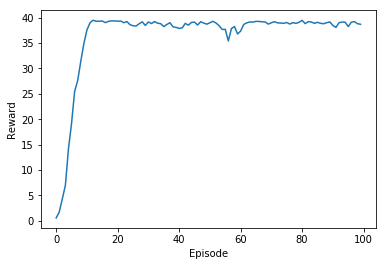

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(reward)), reward)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

In [11]:
env.close()